In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pickle
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import random

random.seed(10)

In [2]:
Data = pd.read_csv("Social_Network_Ads.csv")
Data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
Data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [4]:
encoders = [(["Gender"], LabelEncoder())]
mapper = DataFrameMapper(encoders, df_out=True)
new_cols = mapper.fit_transform(Data.copy())
Data = pd.concat([Data.drop(columns=["Gender"]), new_cols], axis="columns")

c:\Users\Rinew\anaconda3\envs\Tensorflow_CPU\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [5]:

Data

,User ID,Age,EstimatedSalary,Purchased,Gender
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1
...,...,...,...,...,...
395,15691863,46,41000,1,0
396,15706071,51,23000,1,1
397,15654296,50,20000,1,0
398,15755018,36,33000,0,1


$Splitting\;Data$

In [6]:
X = Data[['User ID', 'Gender', 'Age', 'EstimatedSalary']]
y =Data['Purchased']

In [7]:
train_x, test_x, train_label, test_label = train_test_split(
    X,y, test_size=0.3, shuffle=False)

In [8]:
print(train_x.shape)

(280, 4)


In [9]:
print(train_label.shape)

(280,)


In [10]:
print(test_x.shape)

(120, 4)


In [11]:
print(test_label.shape)

(120,)


$Without \;\; Differential \;\; Privacy$

In [12]:
clf = LogisticRegression()

In [13]:
clf.fit(train_x,train_label)

LogisticRegression()

In [14]:
predictions = clf.predict(test_x)

In [15]:
baseline = clf.score(test_x, test_label)
print(baseline)

0.5166666666666667


In [16]:
print("Non-private test accuracy: %.2f%%" % (baseline * 100))

Non-private test accuracy: 51.67%


In [17]:
prediction=clf.predict(test_x)

In [18]:
print('prediction:',prediction[0])

prediction: 0


In [19]:
confusion_matrix(test_label,prediction)

array([[44,  2],
       [56, 18]], dtype=int64)

[[44  2]
 [56 18]]


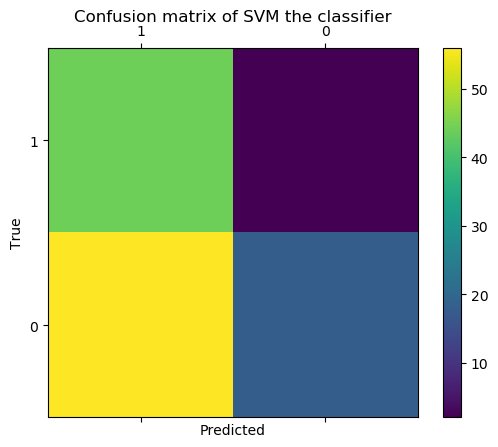

In [20]:
labels = ['1', '0']
cm=confusion_matrix(test_label,prediction)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of SVM the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('SVM Confusion Matrix without privacy.png')
plt.show()

$With \;\; Differential \;\; Privacy$

In [21]:

import diffprivlib.models as dp
from diffprivlib.models import LogisticRegression

In [22]:
dp_clf = dp.LogisticRegression(epsilon=1,C=401)

In [23]:
dp_clf.fit(train_x, train_label)

c:\Users\Rinew\anaconda3\envs\Tensorflow_CPU\lib\site-packages\diffprivlib\models\logistic_regression.py:223: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  "privacy leakage, specify `data_norm` at initialisation.", PrivacyLeakWarning)


LogisticRegression(C=401, accountant=BudgetAccountant(spent_budget=[(1, 0)]),
                   data_norm=15815778.537198888, epsilon=1)

In [24]:
print("Differentially private test accuracy (epsilon=%.2f): %.2f%%" % 
     (dp_clf.epsilon, dp_clf.score(test_x, test_label) * 100))

Differentially private test accuracy (epsilon=1.00): 63.33%


In [25]:
prediction=dp_clf.predict(test_x)

In [26]:
print('prediction:',prediction[0])

prediction: 1


In [27]:
confusion_matrix(test_label,prediction)

array([[44,  2],
       [42, 32]], dtype=int64)

[[44  2]
 [42 32]]


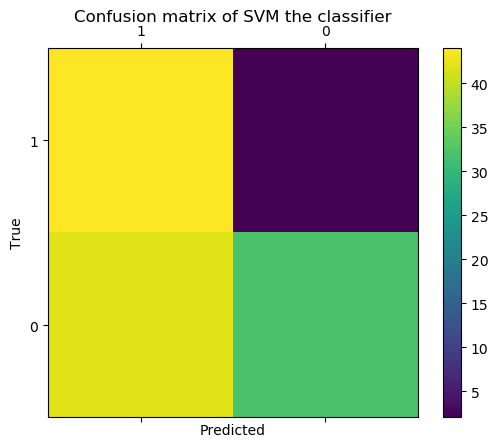

In [28]:
labels = ['1', '0']
cm=confusion_matrix(test_label,prediction)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of SVM the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('SVM Confusion Matrix with privacy.png')
plt.show()